## Introducción a xarray/cartopy

# Xarray

xarray es una librería de Python para trabajar de una manera simple y eficiente con arrays multi-dimensionales que tengan meta-data incluida. En particular, es una librería muy práctica para utilizar archivos de tipo NetCDF (".nc"), que es el tipo de archivo en el cual vamos a disponer las salidas de las simulaciones del modelo atmosférico.

A continuación, veremos algunas de sus principales funcionalidades, que nos servirán para trabajar con los ejercicios de la práctica.

En la siguiente página de referencia, pueden encontrar más info sobre xarray
http://xarray.pydata.org/en/stable/

¿Qué es un archivo NetCDF?
https://www.unidata.ucar.edu/software/netcdf/

¿Cómo abrir un archivo?

In [1]:
# Importamos la librería xarray
import xarray as xr

# Ruta del archivo .nc que vamos a abrir

file = '/home/daniufundar/Documents/Docencia/Circulacion/circulacion-2c2022/EB1.nc'

# Abrimos el archivo correspondiente en forma de un dataset. 
# "decode_times=False" en este caso va a ser un comando necesario.
ds = xr.open_dataset(file,decode_times=False)
print(ds)

<xarray.Dataset>
Dimensions:  (lon: 256, lonb: 257, lat: 128, latb: 129, time: 50)
Coordinates:
  * lon      (lon) float32 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lonb     (lonb) float32 -0.7031 0.7031 2.109 3.516 ... 356.5 357.9 359.3
  * lat      (lat) float32 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * latb     (latb) float32 -90.0 -88.28 -86.87 -85.46 ... 86.87 88.28 90.0
  * time     (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 46.0 47.0 48.0 49.0 50.0
Data variables:
    ucomp    (time, lat, lon) float32 ...
    vcomp    (time, lat, lon) float32 ...
    vor      (time, lat, lon) float32 ...
    div      (time, lat, lon) float32 ...
    h        (time, lat, lon) float32 ...
    pv       (time, lat, lon) float32 ...
    stream   (time, lat, lon) float32 ...
    trs      (time, lat, lon) float32 ...
    tr       (time, lat, lon) float32 ...
    fr       (time, lat, lon) float32 ...
Attributes:
    filename:  shallow.nc
    title:     Diagnostics from spectral s

El archivo que abrimos contiene toda la información de la salida:
1. Dimensiones: tiempo, latitud, longitud
2. Variables: fr (forzante), ucomp(viento zonal)

Vamos a ver a continuación distintas operaciones que podemos hacer con este dataset (ds)

¿Cómo seleccionamos la información para un tiempo específico o para un rango de tiempos?

In [2]:
# Tiempo específico (30)
ds_30 = ds.sel(time=30)
print(ds_30)

<xarray.Dataset>
Dimensions:  (lon: 256, lonb: 257, lat: 128, latb: 129)
Coordinates:
  * lon      (lon) float32 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lonb     (lonb) float32 -0.7031 0.7031 2.109 3.516 ... 356.5 357.9 359.3
  * lat      (lat) float32 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * latb     (latb) float32 -90.0 -88.28 -86.87 -85.46 ... 86.87 88.28 90.0
    time     float64 30.0
Data variables:
    ucomp    (lat, lon) float32 ...
    vcomp    (lat, lon) float32 ...
    vor      (lat, lon) float32 ...
    div      (lat, lon) float32 ...
    h        (lat, lon) float32 ...
    pv       (lat, lon) float32 ...
    stream   (lat, lon) float32 ...
    trs      (lat, lon) float32 ...
    tr       (lat, lon) float32 ...
    fr       (lat, lon) float32 ...
Attributes:
    filename:  shallow.nc
    title:     Diagnostics from spectral shallow water model


In [3]:
# Rango de tiempos (10-25)
ds_10_25 = ds.sel(time=slice(10,25))
print(ds_10_25)

<xarray.Dataset>
Dimensions:  (lon: 256, lonb: 257, lat: 128, latb: 129, time: 16)
Coordinates:
  * lon      (lon) float32 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lonb     (lonb) float32 -0.7031 0.7031 2.109 3.516 ... 356.5 357.9 359.3
  * lat      (lat) float32 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * latb     (latb) float32 -90.0 -88.28 -86.87 -85.46 ... 86.87 88.28 90.0
  * time     (time) float64 10.0 11.0 12.0 13.0 14.0 ... 22.0 23.0 24.0 25.0
Data variables:
    ucomp    (time, lat, lon) float32 ...
    vcomp    (time, lat, lon) float32 ...
    vor      (time, lat, lon) float32 ...
    div      (time, lat, lon) float32 ...
    h        (time, lat, lon) float32 ...
    pv       (time, lat, lon) float32 ...
    stream   (time, lat, lon) float32 ...
    trs      (time, lat, lon) float32 ...
    tr       (time, lat, lon) float32 ...
    fr       (time, lat, lon) float32 ...
Attributes:
    filename:  shallow.nc
    title:     Diagnostics from spectral shall

Lo mismo podemos hacer con un rango de latitudes o longitudes

In [3]:
#Rango de latitudes (10-25)
ds_lat_10_25=ds.sel(lat=slice(10,25))
print(ds_lat_10_25)

<xarray.Dataset>
Dimensions:  (lon: 256, lonb: 257, lat: 11, latb: 129, time: 50)
Coordinates:
  * lon      (lon) float32 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lonb     (lonb) float32 -0.7031 0.7031 2.109 3.516 ... 356.5 357.9 359.3
  * lat      (lat) float32 10.51 11.91 13.31 14.71 ... 20.31 21.71 23.11 24.51
  * latb     (latb) float32 -90.0 -88.28 -86.87 -85.46 ... 86.87 88.28 90.0
  * time     (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 46.0 47.0 48.0 49.0 50.0
Data variables:
    ucomp    (time, lat, lon) float32 ...
    vcomp    (time, lat, lon) float32 ...
    vor      (time, lat, lon) float32 ...
    div      (time, lat, lon) float32 ...
    h        (time, lat, lon) float32 ...
    pv       (time, lat, lon) float32 ...
    stream   (time, lat, lon) float32 ...
    trs      (time, lat, lon) float32 ...
    tr       (time, lat, lon) float32 ...
    fr       (time, lat, lon) float32 ...
Attributes:
    filename:  shallow.nc
    title:     Diagnostics from spectral 

La selección la podemos hacer en simultáneo para las distintas variables

In [5]:
ds_sel = ds.sel(lon=slice(40,200), lat=slice(10,25), time=39)
print(ds_sel)

<xarray.Dataset>
Dimensions:  (lon: 114, lonb: 257, lat: 11, latb: 129)
Coordinates:
  * lon      (lon) float32 40.78 42.19 43.59 45.0 ... 195.5 196.9 198.3 199.7
  * lonb     (lonb) float32 -0.7031 0.7031 2.109 3.516 ... 356.5 357.9 359.3
  * lat      (lat) float32 10.51 11.91 13.31 14.71 ... 20.31 21.71 23.11 24.51
  * latb     (latb) float32 -90.0 -88.28 -86.87 -85.46 ... 86.87 88.28 90.0
    time     float64 39.0
Data variables:
    ucomp    (lat, lon) float32 ...
    vcomp    (lat, lon) float32 ...
    vor      (lat, lon) float32 ...
    div      (lat, lon) float32 ...
    h        (lat, lon) float32 ...
    pv       (lat, lon) float32 ...
    stream   (lat, lon) float32 ...
    trs      (lat, lon) float32 ...
    tr       (lat, lon) float32 ...
    fr       (lat, lon) float32 ...
Attributes:
    filename:  shallow.nc
    title:     Diagnostics from spectral shallow water model


Si no conocemos la longitud exacta, también podemos aproximar por el valor más cercano.

In [4]:
ds_sel = ds.sel(lon=80, method='nearest')
print(ds_sel)

<xarray.Dataset>
Dimensions:  (lonb: 257, lat: 128, latb: 129, time: 50)
Coordinates:
    lon      float32 80.16
  * lonb     (lonb) float32 -0.7031 0.7031 2.109 3.516 ... 356.5 357.9 359.3
  * lat      (lat) float32 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * latb     (latb) float32 -90.0 -88.28 -86.87 -85.46 ... 86.87 88.28 90.0
  * time     (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 46.0 47.0 48.0 49.0 50.0
Data variables:
    ucomp    (time, lat) float32 ...
    vcomp    (time, lat) float32 ...
    vor      (time, lat) float32 ...
    div      (time, lat) float32 ...
    h        (time, lat) float32 ...
    pv       (time, lat) float32 ...
    stream   (time, lat) float32 ...
    trs      (time, lat) float32 ...
    tr       (time, lat) float32 ...
    fr       (time, lat) float32 ...
Attributes:
    filename:  shallow.nc
    title:     Diagnostics from spectral shallow water model


/home/daniufundar/anaconda3/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


Se puede seleccionar también por el índice en vez del valor de la coordenada utilizando "isel" en vez de "sel"

In [7]:
ds_sel = ds.isel(lon=6)
print(ds_sel)

<xarray.Dataset>
Dimensions:  (lonb: 257, lat: 128, latb: 129, time: 50)
Coordinates:
    lon      float32 8.438
  * lonb     (lonb) float32 -0.7031 0.7031 2.109 3.516 ... 356.5 357.9 359.3
  * lat      (lat) float32 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * latb     (latb) float32 -90.0 -88.28 -86.87 -85.46 ... 86.87 88.28 90.0
  * time     (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 46.0 47.0 48.0 49.0 50.0
Data variables:
    ucomp    (time, lat) float32 ...
    vcomp    (time, lat) float32 ...
    vor      (time, lat) float32 ...
    div      (time, lat) float32 ...
    h        (time, lat) float32 ...
    pv       (time, lat) float32 ...
    stream   (time, lat) float32 ...
    trs      (time, lat) float32 ...
    tr       (time, lat) float32 ...
    fr       (time, lat) float32 ...
Attributes:
    filename:  shallow.nc
    title:     Diagnostics from spectral shallow water model


Las salidas obtenidas tienen la misma información que el dataset original restringidas al rango de dimensiones seleccionado.
Podemos hacer distintas operaciones sobre estos datasets. Por ejemplo si queremos hacer un promedio sobre una dimensión, que podría ser la dimensión temporal.

In [5]:
ds_PromTemp = ds.mean(dim='time')
print(ds_PromTemp)

<xarray.Dataset>
Dimensions:  (lon: 256, lonb: 257, lat: 128, latb: 129)
Coordinates:
  * lon      (lon) float32 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lonb     (lonb) float32 -0.7031 0.7031 2.109 3.516 ... 356.5 357.9 359.3
  * lat      (lat) float32 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * latb     (latb) float32 -90.0 -88.28 -86.87 -85.46 ... 86.87 88.28 90.0
Data variables:
    ucomp    (lat, lon) float32 0.06385 0.06385 0.06385 ... 0.06385 0.06385
    vcomp    (lat, lon) float32 -0.0005987 -0.0005987 ... 0.0005987 0.0005987
    vor      (lat, lon) float32 -1.072e-06 -1.072e-06 ... 1.072e-06 1.072e-06
    div      (lat, lon) float32 -1.005e-08 -1.005e-08 ... -1.005e-08 -1.005e-08
    h        (lat, lon) float32 4.029e+04 4.029e+04 ... 4.029e+04 4.029e+04
    pv       (lat, lon) float32 -3.645e-09 -3.645e-09 ... 3.645e-09 3.645e-09
    stream   (lat, lon) float32 3.849e+07 3.849e+07 ... -3.849e+07 -3.849e+07
    trs      (lat, lon) float32 -0.0002193 -0.0

Hasta aquí, estamos conservando todas las variables que componen el archivo. Si queremos solo conservar alguna

In [6]:
ds_ucomp = ds['ucomp']
print(ds_ucomp)

<xarray.DataArray 'ucomp' (time: 50, lat: 128, lon: 256)>
array([[[0.009258, 0.009258, ..., 0.009258, 0.009258],
        [0.021327, 0.021327, ..., 0.021327, 0.021327],
        ...,
        [0.021327, 0.021327, ..., 0.021327, 0.021327],
        [0.009258, 0.009258, ..., 0.009258, 0.009258]],

       [[0.007682, 0.007682, ..., 0.007682, 0.007682],
        [0.017788, 0.017788, ..., 0.017788, 0.017788],
        ...,
        [0.017788, 0.017788, ..., 0.017788, 0.017788],
        [0.007682, 0.007682, ..., 0.007682, 0.007682]],

       ...,

       [[0.078547, 0.078547, ..., 0.078547, 0.078547],
        [0.180916, 0.180916, ..., 0.180916, 0.180916],
        ...,
        [0.180916, 0.180916, ..., 0.180916, 0.180916],
        [0.078547, 0.078547, ..., 0.078547, 0.078547]],

       [[0.078617, 0.078617, ..., 0.078617, 0.078617],
        [0.181076, 0.181076, ..., 0.181076, 0.181076],
        ...,
        [0.181076, 0.181076, ..., 0.181076, 0.181076],
        [0.078617, 0.078617, ..., 0.078617, 0.

In [7]:
ds_ucomp_nparray = ds['ucomp'].values

# Cartopy

Cartopy es una librería de Python que permite realizar graficos georreferenciados (mapas).

En la siguiente página de referencia pueden encontrar más info sobre cartopy  
https://scitools.org.uk/cartopy/docs/latest/

Veamos a continuación un ejemplo de cómo hacer un mapa del viento zonal para el tiempo 20 de simulación (pueden serguir explorando otros argumentos que se pueden utilizar)

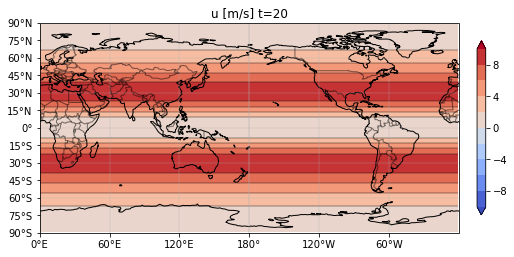

In [8]:
# Importamos algunas librerías y funciones que vamos a usar
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# Definimos los niveles para los contornos (inferior, superior, longitud de los intervalos)
# Si utilizamos las funciones ds.min ds.max podemos darnos una idea de cómo definirlos
lev_inf = -10
lev_sup = 10
lev_int = 2
clevs = np.arange(lev_inf, lev_sup+lev_int, lev_int)

# Convertimos longitudes y latitudes en arreglos 2D
lons, lats = np.meshgrid(ds['lon'], ds['lat'])

#Definimos la figura, podemos definir su tamaño
fig = plt.figure(figsize=(8, 4)) 

#Definimos la proyección que vamos a utilizar para el mapa
ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=180))

#Pasamos las latitudes/longitudes del dataset a una reticula para graficar
crs_latlon = ccrs.PlateCarree()

#Definimos los límites del gráfico (no terminen el gráfico en "360" porque no les va a graficar bien )
ax.set_extent([0,359.9,-90,90], crs=crs_latlon)

#Hacemos el gráfico (contourf) de la variable (viento zonal en el tiempo 20) utilizando los paramétros que definimos antes.
#Más opciones e información sobre colormaps pueden obtener en https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html
#el argumento "extend" define si la escala que estamos utilizando queremos que tenga un valor por encima y por debajo de lev_inf/lev_sup 
im = ax.contourf(lons, lats, ds['ucomp'].sel(time=20), clevs, transform=crs_latlon, cmap='coolwarm',extend='both')

#Si queremos agregar también contornos (se puede definir color, ancho de línea, etc.)
ax.contour(lons, lats,  ds['ucomp'].sel(time=20),clevs,colors='k',linewidths=0.4,transform=crs_latlon)

#Agregamos de la barra de colores. Utiliza los valores y colores que corresponden al gráfico "im" (el contourf en nuestro caso)
#A partir de modificar los argumentos pueden modificar el tamaño de la barra
plt.colorbar(im,fraction=0.02, pad=0.04,shrink=0.8,aspect=20)

#Agregamos características del mapa como las costas y los bordes políticos
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)

#Agregamos línea de retícula en el mapa
ax.gridlines(crs=crs_latlon, linewidth=0.3, linestyle='-')

#Definimos las marcas correspondientes para las longitudes/latitudes
ax.set_xticks(np.arange(0, 360,  60), crs=crs_latlon)
ax.set_yticks(np.arange(-90, 105,  15), crs=crs_latlon)   
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

#Definimos el título del gráfico
ax.set_title('u [m/s] t=20')

#Guardamos la figura
plt.savefig('u_20.png')  

# Gráficos con paneles

Hay dististas maneras de realizar figuras con múltiples gráficos dispuestos en paneles.

Una forma es utilizar Gridspec una de las fuciones que están dentro de la librería matplotlib. En el link van a poder encontrar algunas aclaraciones de cómo usarla y también algunos ejemplos.
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.gridspec.GridSpec.html

En el siguiente ejemplo vamos a graficar en 4 paneles el viento zonal para 4 tiempos distintos (utilizamos para el gráfico las mismas cosas que definimos antes)

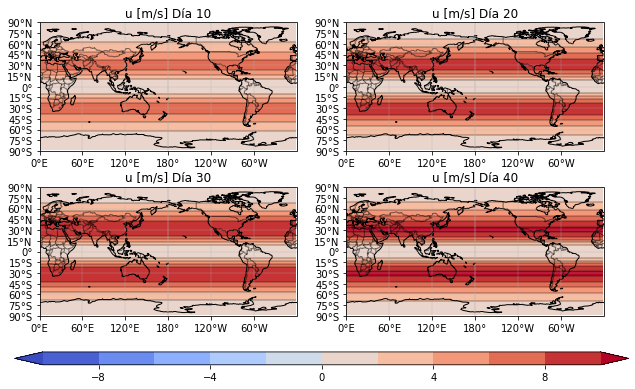

In [9]:
#Importamos la función gridspec desde matplotlib
import matplotlib.gridspec as gridspec

#Creamos la figura
fig = plt.figure(figsize=(11, 6.3))

#Disponemos el arreglo de paneles que vamos a utilizar (en este caso 3 filas y 2 columnas, donde la tercer fila la incluimos para la barra de colores)
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[3, 3,0.3], width_ratios=[5.5,5.5])

#Panel superior, izquierda (día 10)
ax = plt.subplot(gs[0],projection=ccrs.PlateCarree(central_longitude=180))
crs_latlon = ccrs.PlateCarree()
ax.set_extent([0,359.9,-90,90], crs=crs_latlon)
im=ax.contourf(lons, lats, ds['ucomp'].sel(time=10),clevs,transform=crs_latlon,cmap='coolwarm',extend='both')
ax.contour(lons, lats,  ds['ucomp'].sel(time=10),clevs,colors='k',linewidths=0.4,transform=crs_latlon)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.gridlines(crs=crs_latlon, linewidth=0.3, linestyle='-')
ax.set_xticks(np.arange(0, 360,  60), crs=crs_latlon)
ax.set_yticks(np.arange(-90, 105,  15), crs=crs_latlon)   
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_title('u [m/s] Día 10')
             
#Panel superior, derecha (día 20)
ax = plt.subplot(gs[1],projection=ccrs.PlateCarree(central_longitude=180))
crs_latlon = ccrs.PlateCarree()
ax.set_extent([0,359.9,-90,90], crs=crs_latlon)
ax.contourf(lons, lats, ds['ucomp'].sel(time=20),clevs,transform=crs_latlon,cmap='coolwarm',extend='both')
ax.contour(lons, lats,  ds['ucomp'].sel(time=20),clevs,colors='k',linewidths=0.4,transform=crs_latlon)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.gridlines(crs=crs_latlon, linewidth=0.3, linestyle='-')
ax.set_xticks(np.arange(0, 360,  60), crs=crs_latlon)
ax.set_yticks(np.arange(-90, 105,  15), crs=crs_latlon)   
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_title('u [m/s] Día 20')
             
#Panel inferior, izquierda (día 30)
ax = plt.subplot(gs[2],projection=ccrs.PlateCarree(central_longitude=180))
crs_latlon = ccrs.PlateCarree()
ax.set_extent([0,359.9,-90,90], crs=crs_latlon)
ax.contourf(lons, lats, ds['ucomp'].sel(time=30),clevs,transform=crs_latlon,cmap='coolwarm',extend='both')
ax.contour(lons, lats,  ds['ucomp'].sel(time=30),clevs,colors='k',linewidths=0.4,transform=crs_latlon)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.gridlines(crs=crs_latlon, linewidth=0.3, linestyle='-')
ax.set_xticks(np.arange(0, 360,  60), crs=crs_latlon)
ax.set_yticks(np.arange(-90, 105,  15), crs=crs_latlon)   
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_title('u [m/s] Día 30')
             
#Panel inferior, derecha (día 40)
ax = plt.subplot(gs[3],projection=ccrs.PlateCarree(central_longitude=180))
crs_latlon = ccrs.PlateCarree()
ax.set_extent([0,359.9,-90,90], crs=crs_latlon)
ax.contourf(lons, lats, ds['ucomp'].sel(time=40),clevs,transform=crs_latlon,cmap='coolwarm',extend='both')
ax.contour(lons, lats,  ds['ucomp'].sel(time=40),clevs,colors='k',linewidths=0.4,transform=crs_latlon)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.gridlines(crs=crs_latlon, linewidth=0.3, linestyle='-')
ax.set_xticks(np.arange(0, 360,  60), crs=crs_latlon)
ax.set_yticks(np.arange(-90, 105,  15), crs=crs_latlon)   
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_title('u [m/s] Día 40')
           
#Agregamos la barra de colores
ax=plt.subplot(gs[4:])
plt.colorbar(im,orientation='horizontal',fraction=0.05,aspect=10,cax=ax)

#Ajustamos espacios entre los paneles
plt.subplots_adjust(hspace=0.4, wspace=0)